## Study the changes when modifying geometry dimensions

In [1]:
import ROOT, rat
import os, sys
import matplotlib.pyplot as plt
import numpy as np
import collections
%matplotlib inline 
sys.path.append('/home/jp/projects/python_tools')
sys.path.append('/home/jp/projects/snoplus/python_modules')
import jp_mpl as jplot
import geo_studies, rat_misc

TClass::TClass:0: RuntimeWarning: no dictionary for class omtext is available


In [2]:
reload(geo_studies)

<module 'geo_studies' from '/home/jp/projects/snoplus/python_modules/geo_studies.pyc'>

In [3]:
ratreader = None

In [4]:
def ropeShadow(data):
    print 'Rope shadow'
    # All zenith angles
    a = dict(collections.Counter(data['end_volume']).items())
    total = len(data['end_volume'])
    outav = total - a['snoav'] - a['snosv']
    print 'Global shadowing', a['snorope']*1./outav
    
    # Only upper half
    mybool = data['costheta_dir']>0
    a = dict(collections.Counter(data['end_volume'][mybool]).items())
    total = len(data['end_volume'][mybool])
    outav = total - a['snoav'] - a['snosv']
    print 'Upper hemisphere shadowing', a['snorope']*1./outav    

### This is the native geometry with original dimensions

In [5]:
# Opening the file
infile_dir = '/home/jp/projects/snoplus/rundir/nativegeo_tune/'
infile_dir += 'original_dimensions'
infile_name = 'pbomb380.root'
ratreader = rat_misc.openRat(infile_dir, infile_name, ratreader)
reference = geo_studies.doRead(ratreader=ratreader, max_photons = 10000000)
ropeShadow(reference)

No ratreader file. Opening it for the first time
Rope shadow
Global shadowing 0.0238508376603
Upper hemisphere shadowing 0.0335253215869


### Changing the AV size from 6001. to 6011.4 mm in radius

In [6]:
# Opening the file
infile_dir = '/home/jp/projects/snoplus/rundir/nativegeo_tune/'
infile_dir += 'bigger_av'
infile_name = 'pbomb380.root'
ratreader = rat_misc.openRat(infile_dir, infile_name, ratreader)
bigav = geo_studies.doRead(ratreader=ratreader, max_photons = 10000000)
ropeShadow(bigav)

No ratreader file. Opening it for the first time
Rope shadow
Global shadowing 0.0240941418864
Upper hemisphere shadowing 0.0336142438247


/home/jp/projects/python_tools/jp_mpl.py:85: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if yerror == None:


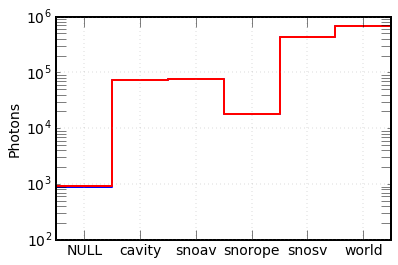

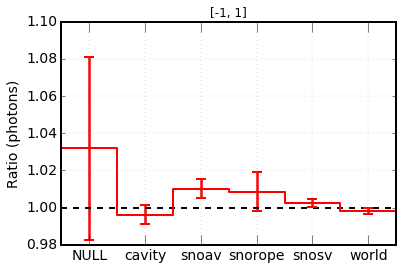

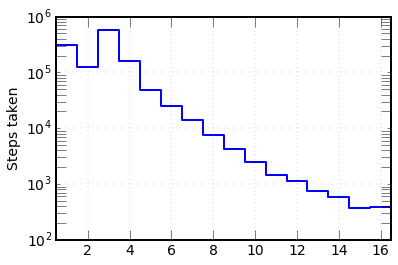

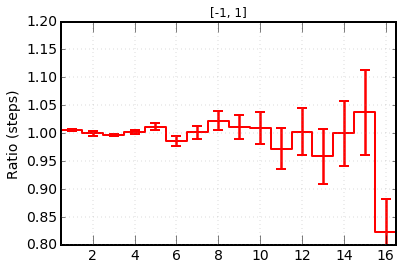

In [7]:
geo_studies.compareTracking(set_list = [reference, bigav])

/home/jp/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


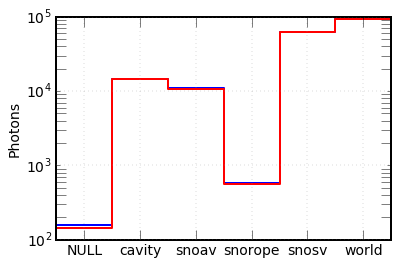

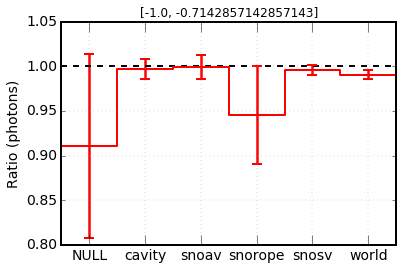

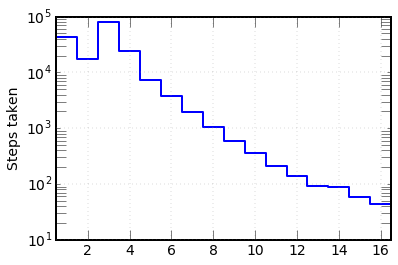

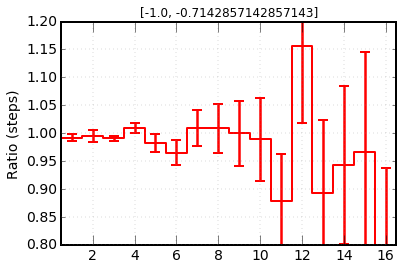

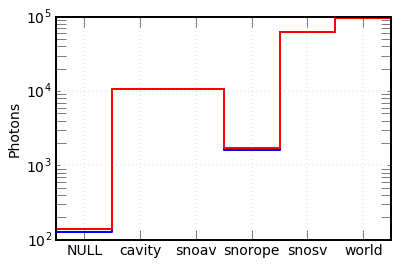

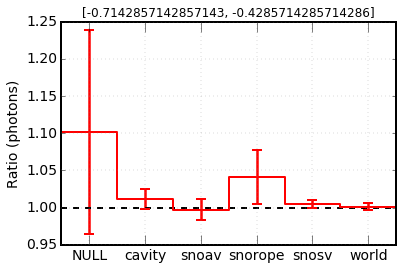

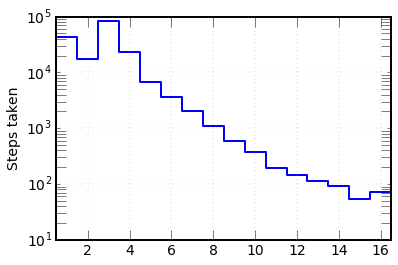

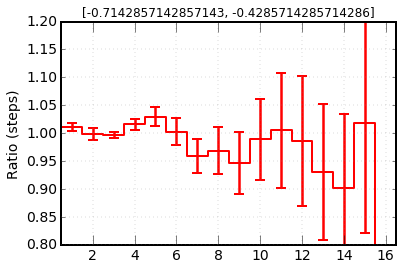

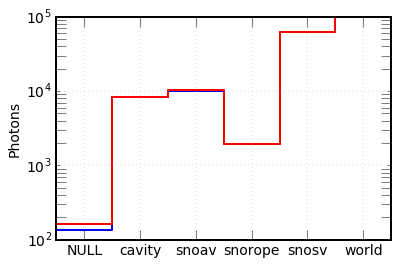

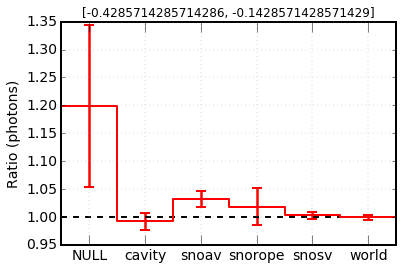

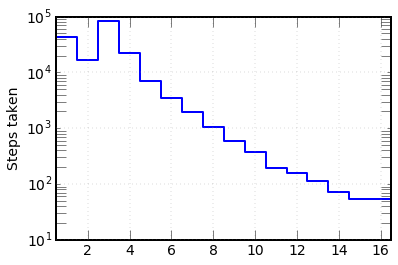

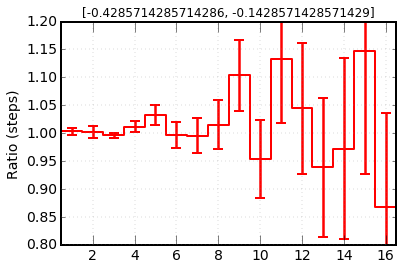

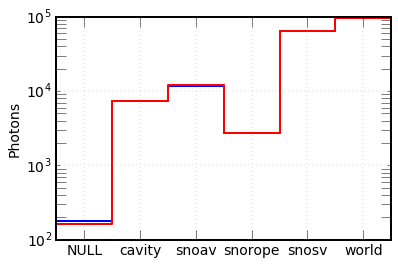

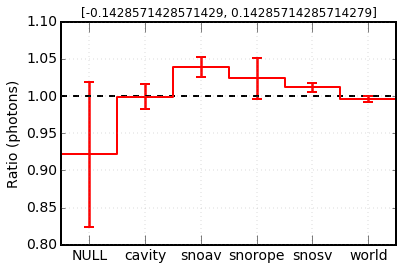

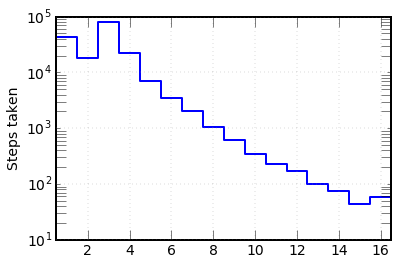

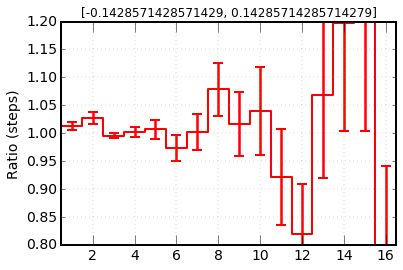

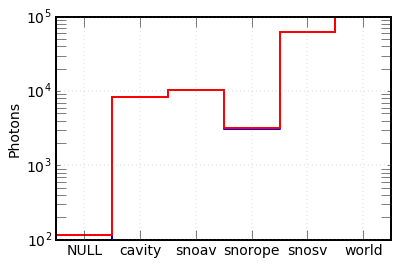

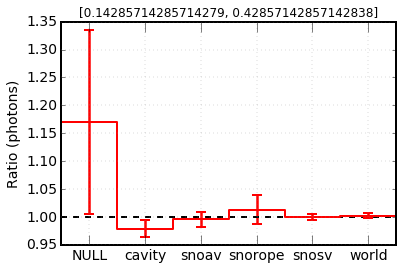

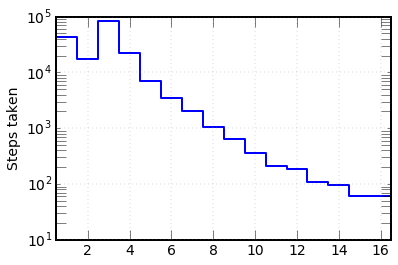

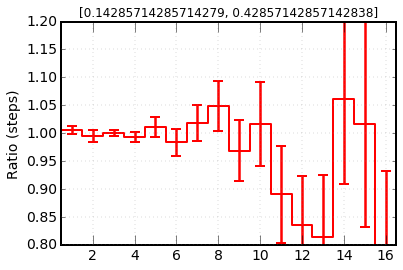

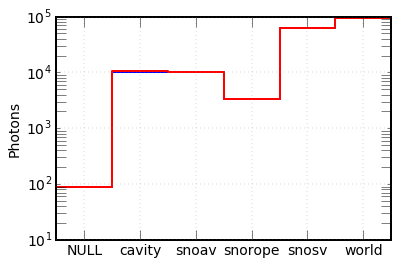

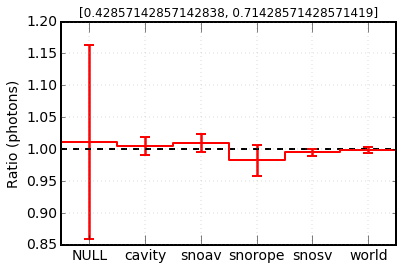

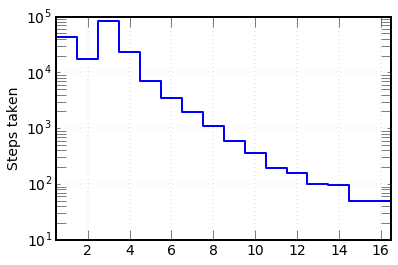

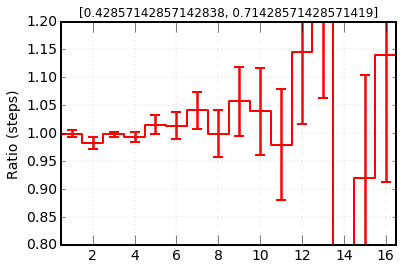

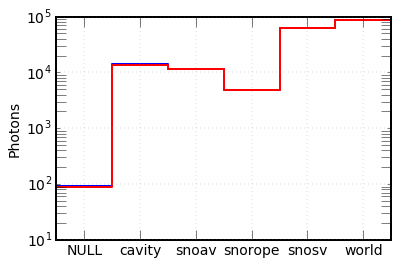

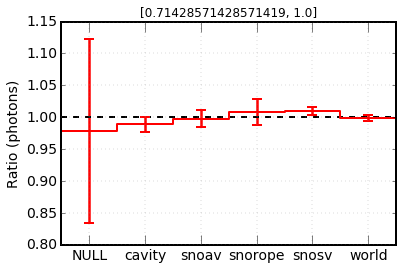

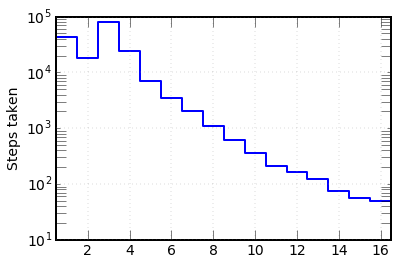

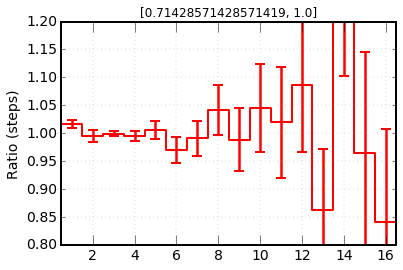

In [8]:
cosz_list = np.linspace(-1, 1, 8)
for i in range(len(cosz_list)-1):
    costheta_range = [cosz_list[i],cosz_list[i+1]]
    #print '\nRange ', costheta_range
    geo_studies.compareTracking(set_list = [reference, bigav],
                               costheta_range = costheta_range)


### Making the hold down rope thicker

In [9]:
# Opening the file
infile_dir = '/home/jp/projects/snoplus/rundir/nativegeo_tune/'
infile_dir += 'thick_downrope'
infile_name = 'pbomb380.root'
ratreader = rat_misc.openRat(infile_dir, infile_name, ratreader)
downrope = geo_studies.doRead(ratreader=ratreader, max_photons = 10000000)
ropeShadow(downrope)

No ratreader file. Opening it for the first time
Rope shadow
Global shadowing 0.0307100613568
Upper hemisphere shadowing 0.0427948772713


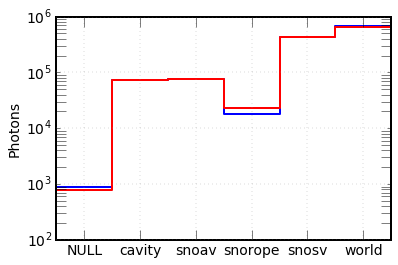

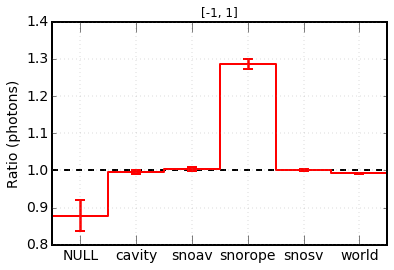

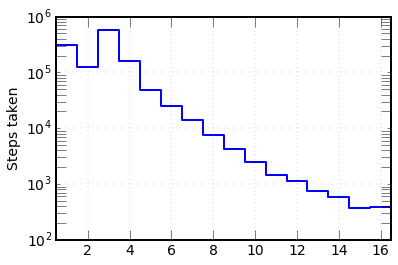

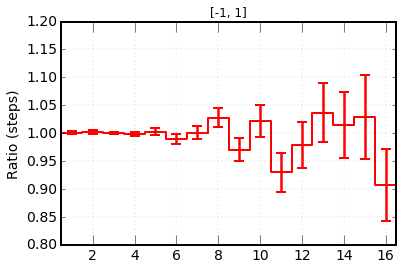

In [10]:
geo_studies.compareTracking(set_list = [reference, downrope])

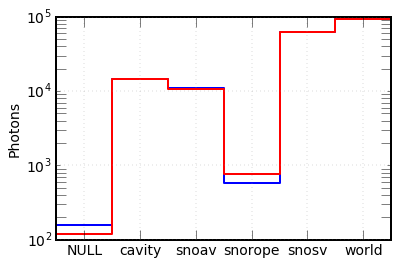

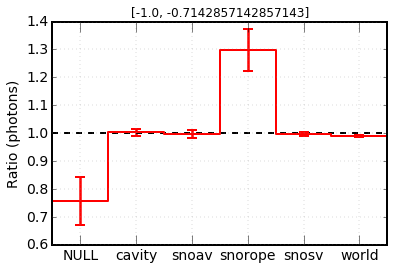

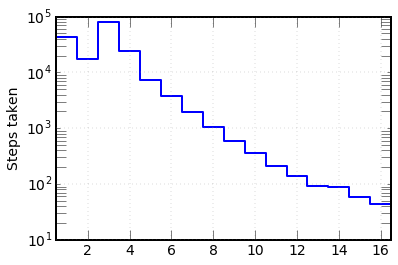

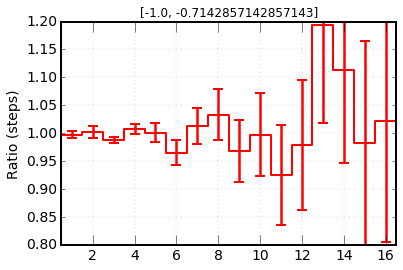

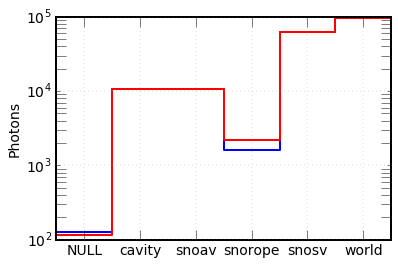

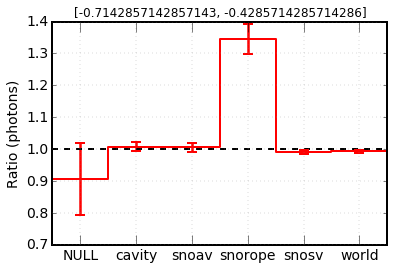

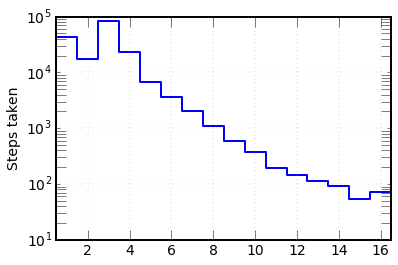

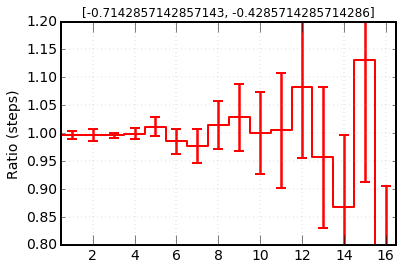

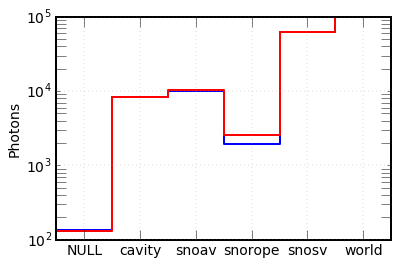

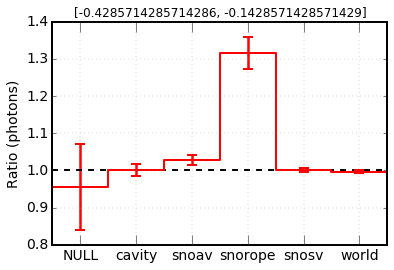

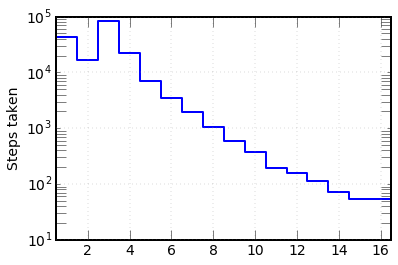

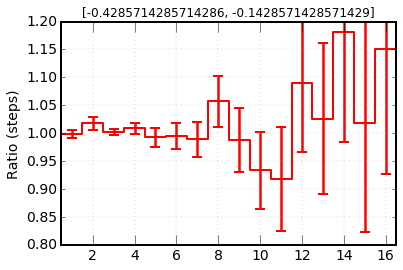

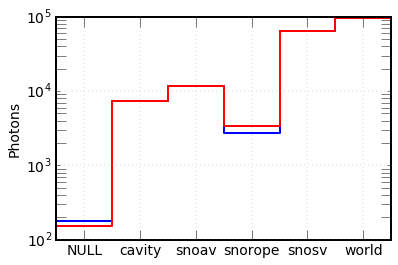

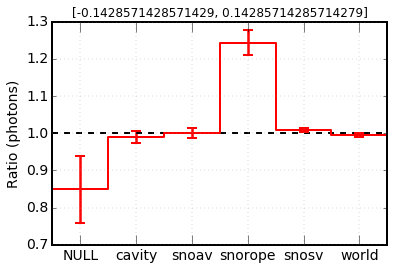

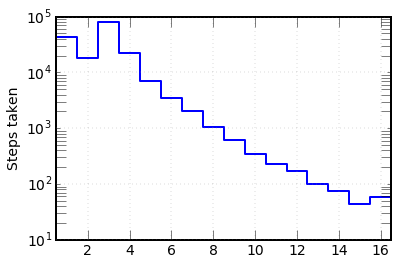

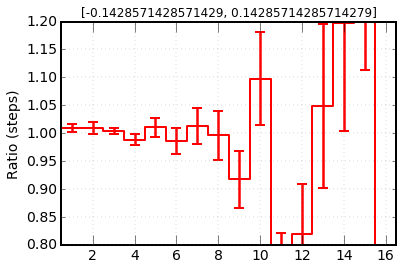

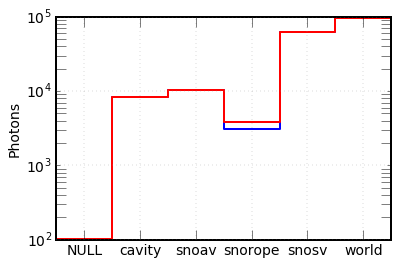

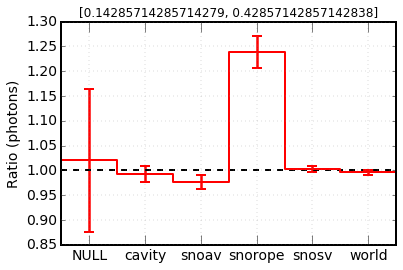

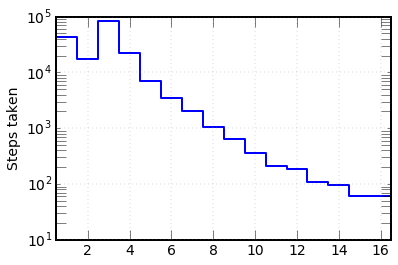

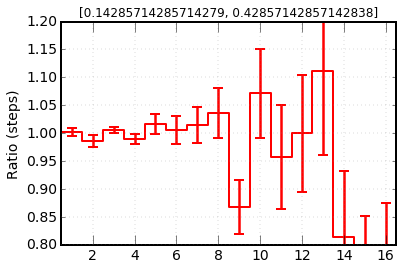

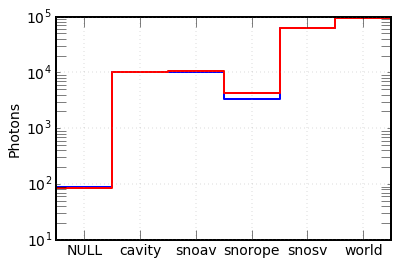

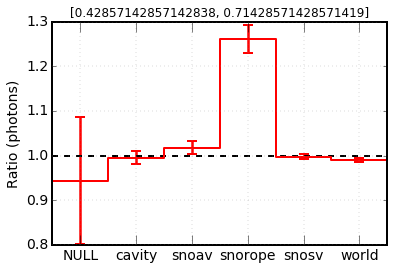

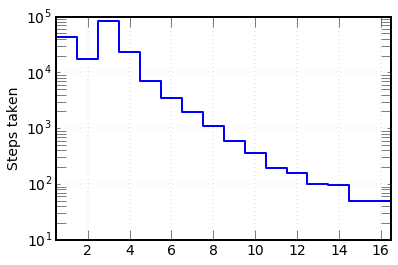

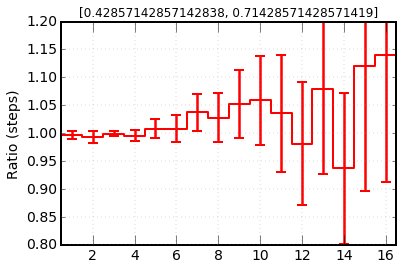

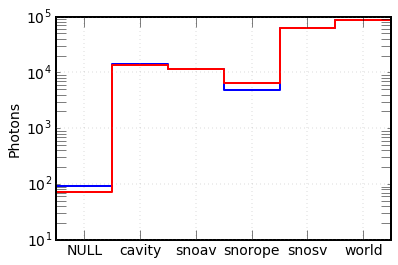

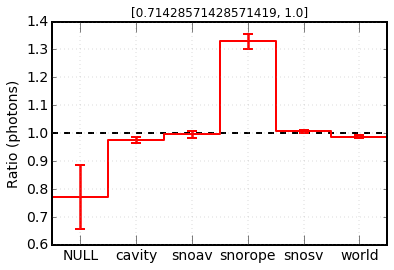

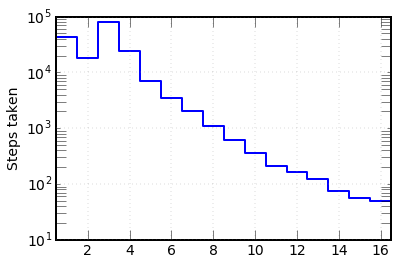

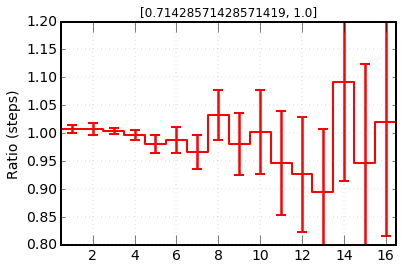

In [11]:
cosz_list = np.linspace(-1, 1, 8)
for i in range(len(cosz_list)-1):
    costheta_range = [cosz_list[i],cosz_list[i+1]]
    #print '\nRange ', costheta_range
    geo_studies.compareTracking(set_list = [reference, downrope],
                               costheta_range = costheta_range)


In [ ]:
geo_studies.compareTracking(set_list = [reference, downrope])